In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Umesh Anand\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Umesh Anand\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Umesh Anand\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Umesh Anand\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [5]:

import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
    # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='username',
    password='password',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/My Coding/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "username",
                            password = "password",
                            database = "ecommerce")

cur = db.cursor()


# 1. list all unique cities where customers are located

In [7]:
query = """ select distinct customer_city from customers """
cur.execute(query)

data = cur.fetchall()
print(data)

[('franca',), ('sao bernardo do campo',), ('sao paulo',), ('mogi das cruzes',), ('campinas',), ('jaragua do sul',), ('timoteo',), ('curitiba',), ('belo horizonte',), ('montes claros',), ('rio de janeiro',), ('lencois paulista',), ('caxias do sul',), ('piracicaba',), ('guarulhos',), ('pacaja',), ('florianopolis',), ('aparecida de goiania',), ('santo andre',), ('goiania',), ('cachoeiro de itapemirim',), ('sao jose dos campos',), ('sao roque',), ('camacari',), ('resende',), ('sumare',), ('novo hamburgo',), ('sao luis',), ('sao jose',), ('santa barbara',), ('ribeirao preto',), ('ituiutaba',), ('taquarituba',), ('sao jose dos pinhais',), ('barrinha',), ('parati',), ('dourados',), ('trindade',), ('cascavel',), ('fortaleza',), ('brasilia',), ('pelotas',), ('porto alegre',), ('salto',), ('jundiai',), ('cacapava',), ('sao vicente',), ('uberlandia',), ('botelhos',), ('sao goncalo',), ('araucaria',), ('nova iguacu',), ('areia branca',), ('campos dos goytacazes',), ('sao carlos',), ('itajuba',), (

In [8]:
df = pd.DataFrame(data)
print(df)

                          0
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


# 2. count the number of orders placed in 2017

In [9]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)

data = cur.fetchall()
"total orderes purchased in", data[0][0]

('total orderes purchased in', 90202)

# 3. find the total sales per category

In [10]:
query = """ select products.product_category category, 
round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category """

cur.execute(query)

data = cur.fetchall()
#print(data)

df = pd.DataFrame(data, columns=['Category', 'Sales'])
print(df)

                       Category       Sales
0                     perfumery  1013477.32
1          Furniture Decoration  2860352.78
2                     telephony   973764.10
3                bed table bath  3425107.34
4                    automotive  1704588.66
..                          ...         ...
69               cds music dvds     2398.86
70                   La Cuisine     5827.06
71  Fashion Children's Clothing     1571.34
72                     PC Gamer     4348.86
73       insurance and services      649.02

[74 rows x 2 columns]


# 4. calculate the percentage of orders that were made in installments

In [11]:
query = """ select sum(case when payment_installments >=1 then  1 else 0 end)/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()
#print(data)

"the percentage of orders that were made in installments is", data[0][0]

('the percentage of orders that were made in installments is',
 Decimal('99.9981'))

# 5. count the number of customers from each state

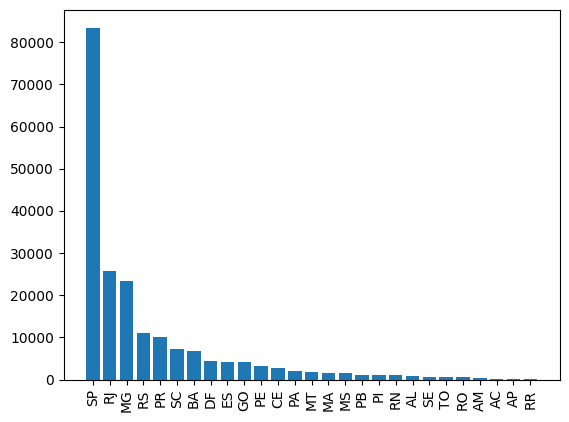

In [12]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()
#print(data)
data
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending=False)
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

# 6. calculate the number of order per months in 2018

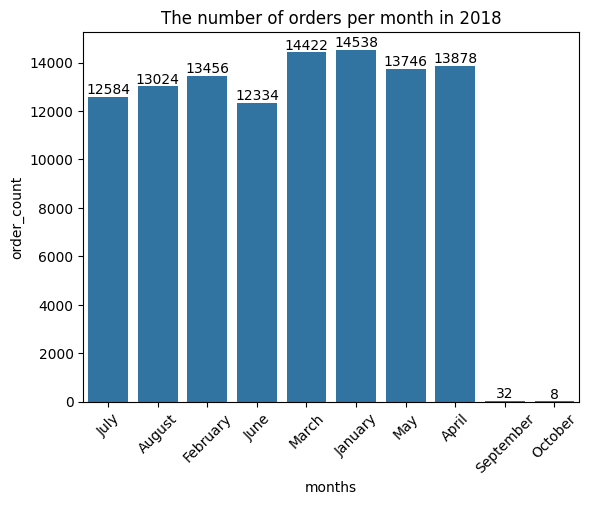

In [13]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data = cur.fetchall()
#print(data)
df = pd.DataFrame(data, columns = ["months", "order_count"])
df
ax = sns.barplot(x=df['months'], y=df['order_count'], data=df)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("The number of orders per month in 2018")
plt.show()


# 7. find the number of products per order, grouped by customer city

In [14]:
query = """ with count_per_order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_city", "products_per_order"])
df

,customer_city,products_per_order
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
...,...,...
4105,tibau do sul,2.00
4106,sao mamede,2.00
4107,guairaca,4.00
4108,sambaiba,2.00


# 8. calculate the percentage of total revenue contributed by each product category

In [15]:
query = """ select products.product_category category, 
(sum(payments.payment_value)/(select sum(payments.payment_value) from payments))*100 sales 
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales desc;

select sum(payments.payment_value) from payments"""

cur.execute(query)

data = cur.fetchall()
#print(data)

df = pd.DataFrame(data, columns=['Category', 'Sales'])
print(df)

                       Category      Sales
0                bed table bath  21.395057
1                 HEALTH BEAUTY  20.705683
2          computer accessories  19.805648
3          Furniture Decoration  17.867297
4               Watches present  17.855308
..                          ...        ...
69                     PC Gamer   0.027165
70              House Comfort 2   0.021370
71               cds music dvds   0.014985
72  Fashion Children's Clothing   0.009815
73       insurance and services   0.004054

[74 rows x 2 columns]


# 9. identify the corelation between product price and the number of times a pruduct has been purchased

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "username",
                            password = "password",
                            database = "ecommerce")

cur = db.cursor()

query = """ select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category """

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Order_count", "Price"])
print(df)

arr1 = df["Order_count"]
arr2 = df["Price"]
np.corrcoef([arr1,arr2])

                           Category  Order_count   Price
0                     HEALTH BEAUTY        19340  130.16
1                     sport leisure        17282  114.34
2                        Cool Stuff         7592  167.36
3              computer accessories        15654  116.51
4                   Watches present        11982  201.14
..                              ...          ...     ...
69                          flowers           66   33.64
70  Kitchen portable and food coach           30  264.57
71       CITTE AND UPHACK FURNITURE           76  114.95
72                  House Comfort 2           60   25.34
73                   cds music dvds           28   52.14

[74 rows x 3 columns]


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 10. calculate the total revenue generated by each sseller, and rank them by revenue

In [23]:
query = """ select *, rank() over (order by revenue desc) as rn from 
(select order_items.seller_id, sum(payments.payment_value)
revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""

cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.9073021412, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.0398402214, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.26976528764, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42012761533, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.0804977417, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31931465864, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.1209387779, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.30050226487, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.22986984253, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.20970630646, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.74904833734, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80002561212, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.7397725582, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91018915176, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.3400707245, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04013061523, 16),
 ('620c